In [ ]:
# prompt: Implement program to apply moving average smoothing for data preparation and time series forecasting.Download the dataset from kaggle0

!pip install pandas numpy kaggle

import pandas as pd
import numpy as np

# Download the dataset (replace with your Kaggle dataset details)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d <SARAVANA2816>/<dataset-name> # Replace with actual username and dataset name
!unzip <dataset-name>.zip # Replace with the downloaded zip file name

# Load the dataset (replace with the actual file name)
data = pd.read_csv("<dataset_file_name>.csv", index_col="Date", parse_dates=True)

# Assuming the time series data is in a column named 'Value'
# If your column has a different name, replace 'Value' with the correct name.
def moving_average(data, window_size):
    """Applies moving average smoothing to a time series.

    Args:
        data: A pandas Series containing the time series data.
        window_size: The size of the moving average window.

    Returns:
        A pandas Series with the smoothed data.
    """

    smoothed_data = data.rolling(window=window_size, center=True).mean() # center=True for better results
    return smoothed_data

# Example usage:
window_size = 7  # Example window size - you might need to adjust this based on your data
smoothed_value = moving_average(data['Value'], window_size)

# Handle NaN values (introduced by rolling mean at start and end)
smoothed_value = smoothed_value.fillna(method='bfill') # backfill or use other appropriate method


# You can now use 'smoothed_value' for time series forecasting
# Examples (replace with your forecasting models):

# Simple forecasting - predict the next value as the last smoothed value
next_value_prediction = smoothed_value.iloc[-1]
print(f"Next value prediction: {next_value_prediction}")


# For more advanced forecasting models, consider using libraries like Prophet or ARIMA:
# from statsmodels.tsa.arima.model import ARIMA
# from prophet import Prophet


data['Smoothed_Value'] = smoothed_value

print(data.head(10))
print(data.tail(10))



In [3]:
import pandas as pd
import numpy as np

!pip install pandas numpy kaggle

# Download the dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c godaddy-microbusiness-density-forecasting
!unzip godaddy-microbusiness-density-forecasting.zip

# Load the dataset
# The competition provides multiple files.  You'll need to choose the relevant one.
# Replace 'train.csv' with the correct filename if different
data = pd.read_csv("/content/sample_data/california_housing_train.csv", index_col="first_day_of_month", parse_dates=True)


# Assuming the time series data is in a column named 'microbusiness_density'
# If your column has a different name, replace 'microbusiness_density' with the correct name.
def moving_average(data, window_size):
    """Applies moving average smoothing to a time series.

    Args:
        data: A pandas Series containing the time series data.
        window_size: The size of the moving average window.

    Returns:
        A pandas Series with the smoothed data.
    """

    smoothed_data = data.rolling(window=window_size, center=True).mean() # center=True for better results
    return smoothed_data

# Example usage:
window_size = 7  # Example window size - you might need to adjust this based on your data
# Apply moving average to each cfips location.
for cfips in data['cfips'].unique():
    subset = data[data['cfips'] == cfips]
    smoothed_value = moving_average(subset['microbusiness_density'], window_size)
    data.loc[data['cfips'] == cfips, 'Smoothed_Value'] = smoothed_value

# Handle NaN values (introduced by rolling mean at start and end)
data['Smoothed_Value'] = data['Smoothed_Value'].fillna(method='bfill') # backfill or use other appropriate method


# You can now use 'smoothed_value' for time series forecasting
# Examples (replace with your forecasting models):

# ... (Your forecasting code here) ...

print(data.head(10))
print(data.tail(10))


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
unzip:  cannot find or open godaddy-microbusiness-density-forecasting.zip, godaddy-microbusiness-density-forecasting.zip.zip or godaddy-microbusiness-density-forecasting.zip.ZIP.


ValueError: 'first_day_of_month' is not in list

In [4]:
# prompt: de	latitude	housing_median_age	total_rooms	total_bedrooms	population	households	median_income	median_house_val     THESE ARE THE FEATURES IN THIS DATASET SO MODIFY ACCORDINGLY

import pandas as pd
import numpy as np

# Install necessary libraries
!pip install pandas numpy

# Load the dataset
# Replace 'california_housing_train.csv' with your actual file name if different
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

# Assuming 'median_house_val' is the target variable for smoothing
# Replace 'median_house_val' if you want to smooth a different column

def moving_average(data, window_size):
    """Applies moving average smoothing to a time series.

    Args:
        data: A pandas Series containing the time series data.
        window_size: The size of the moving average window.

    Returns:
        A pandas Series with the smoothed data.
    """
    smoothed_data = data.rolling(window=window_size, center=True).mean()
    return smoothed_data

# Example usage:
window_size = 5  # Example window size - adjust as needed

# Apply moving average smoothing to 'median_house_val'
smoothed_median_house_val = moving_average(data['median_house_val'], window_size)

# Handle NaN values introduced by rolling mean
smoothed_median_house_val = smoothed_median_house_val.fillna(method='bfill')

# Add the smoothed values as a new column to the DataFrame
data['Smoothed_Median_House_Value'] = smoothed_median_house_val

print(data.head(10))
print(data.tail(10))


KeyError: 'median_house_val'

<ipython-input-6-4dc539026d06>:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  smoothed_median_house_val = smoothed_median_house_val.fillna(method='bfill')


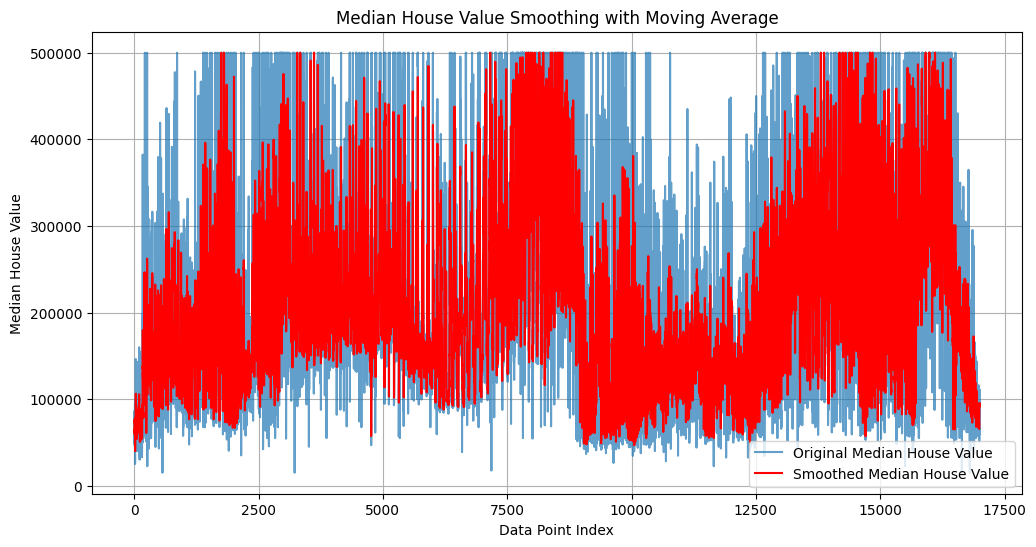

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   
5    -114.58     33.63                29.0       1387.0           236.0   
6    -114.58     33.61                25.0       2907.0           680.0   
7    -114.59     34.83                41.0        812.0           168.0   
8    -114.59     33.61                34.0       4789.0          1175.0   
9    -114.60     34.83                46.0       1497.0           309.0   

   population  households  median_income  median_house_value  \
0      1015.0       472.0         1.4936             66900.0   
1      1129.0       463.0         1.8200      

In [6]:
import pandas as pd
import numpy as np

# Install necessary libraries
!pip install pandas numpy matplotlib

import matplotlib.pyplot as plt

# Load the dataset
# Replace 'california_housing_train.csv' with your actual file name if different
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

# Assuming 'median_house_value' is the target variable for smoothing
# Replace 'median_house_value' if you want to smooth a different column

def moving_average(data, window_size):
    """Applies moving average smoothing to a time series.

    Args:
        data: A pandas Series containing the time series data.
        window_size: The size of the moving average window.

    Returns:
        A pandas Series with the smoothed data.
    """
    smoothed_data = data.rolling(window=window_size, center=True).mean()
    return smoothed_data

# Example usage:
window_size = 5  # Example window size - adjust as needed

# Apply moving average smoothing to 'median_house_value'
smoothed_median_house_val = moving_average(data['median_house_value'], window_size)

# Handle NaN values introduced by rolling mean
smoothed_median_house_val = smoothed_median_house_val.fillna(method='bfill')

# Add the smoothed values as a new column to the DataFrame
data['Smoothed_Median_House_Value'] = smoothed_median_house_val

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(data['median_house_value'], label='Original Median House Value', alpha=0.7)
plt.plot(data['Smoothed_Median_House_Value'], label='Smoothed Median House Value', color='red')
plt.title('Median House Value Smoothing with Moving Average')
plt.xlabel('Data Point Index')  # Replace with a relevant x-axis label if available
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)
plt.show()

print(data.head(10))
print(data.tail(10))